# 2022 Fall Business Analytics Topic 1: Dimensionality Reduction Tutorial
## Unsupervised Dimensionality Reduction: Multidimensional Scaling
### 2022010558 김지현

-------

# Multidimensional Reduction (MDS)
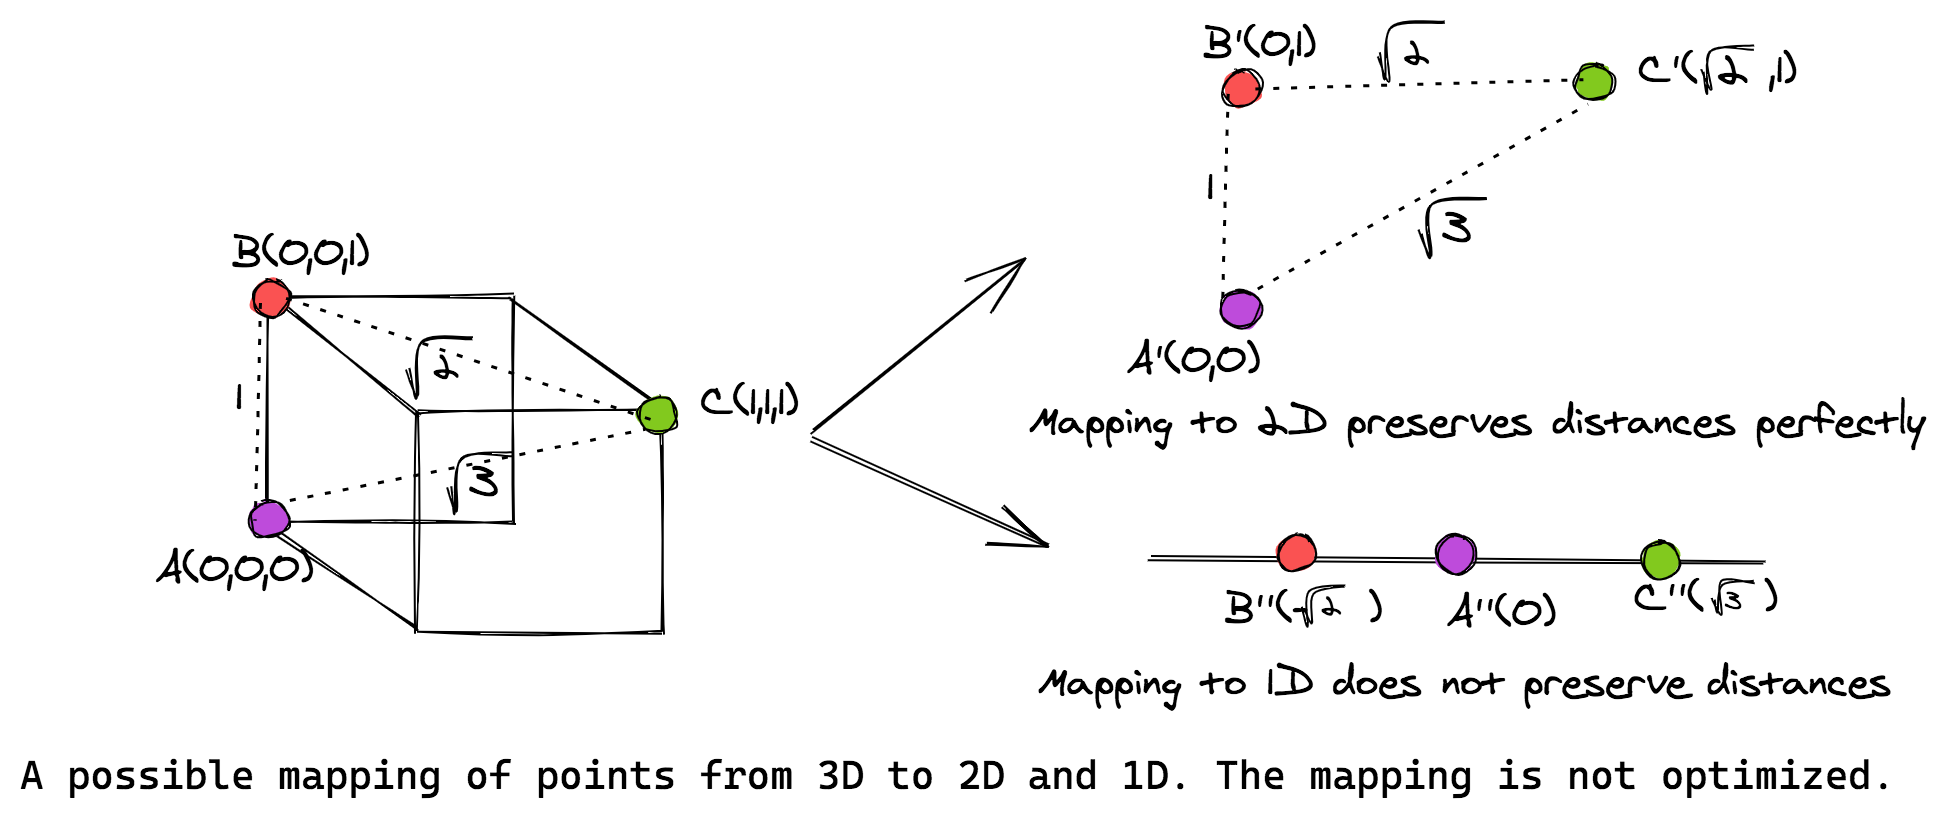

MDS는 데이터를 저차원 공간으로 mapping 함에 있어 non-linear 방식을 사용하는 기법입니다. 고차원 공간에 있는 점을 저차원 공간에 mapping하면서, 해당 점 사이의 거리를 최대한 유지하는 것이 MDS의 목적입니다. 즉, 저차원 공간 상에서 데이터의 Pairwise Distance는 고차원 공간의 실제 거리와 거의 일치해야 합니다. MDS는 Classification 및 Regression Task에서도 전처리 단계 차원에서 사용할 수 있는데, 변수를 축소할뿐 아니라 데이터를 시각화함에 있어서도 효과적인 기술입니다. 저차원 공간에서도 고차원의 원본 데이터와 동일한 Cluster와 Pattern을 유지하기 때문에, 일례로 5차원의 데이터가 있다고 하더라도 3차원 데이터로 만들어 시각화할 수 있는 것입니다.  
일반적으로 MDS에서 데이터 간 Pairwise Distance를 구하는 방법은 유클리디안 거리를 이용하지만, 다른 적절한 metric을 이용하여 비교할 수도 있습니다. 본 튜토리얼에서는 Scikit-learn 라이브러리를 사용하여서, python을 이용해 다차원 척도법을 구현해보고자 합니다. 간단한 예제를 통해서 MDS 적용 방법론을 알아보겠습니다.

-----------

# How to Use

## 0. Import Necessary Libraries

In [1]:
# impoer scikit-learn pacakges for mds
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances

# data type: np.ndarray
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
sns.set_palette("Pastel1")

import rich

# Dataset
from sklearn import datasets
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## 1. Make Dataset

임의의 데이터셋을 하나 생성하여 MDS를 어떻게 적용할 수 있는지 보겠습니다. 3개의 변수에 대해 10개의 관측치를 가진 데이터 X를 임의 생성하였습니다.

In [2]:
# Make dataset
X = np.random.uniform(1, 10, size=(10, 3))
rich.print('[bold][black]Raw X data: ', '\n', f'[black]{X}')

Raw X data:  
 [[1.09753561 9.68224732 1.26021331]
 [9.19426521 9.26726505 5.91679669]
 [5.04505954 2.08399219 2.9640922 ]
 [2.76727881 1.01026196 8.75713248]
 [2.90487636 7.27812037 9.78779242]
 [7.29278191 1.32769212 1.88002753]
 [3.25528262 6.97052909 5.38122485]
 [5.70529503 3.45607234 8.80399363]
 [8.292335   7.15178686 5.61515731]
 [5.69440136 2.84328132 5.86400222]]

## 2. MDS: A Simple Illustration

Scikit-learn에서 제공하는 MDS class를 생성하고, 내부 method를 호출하여 차원을 축소시켜 보겠습니다. 해당 method는 2D 공간에서의 임베딩 된 값을 반환하며, 결과 값은 다음과 같습니다.

In [5]:
mds = MDS(random_state=2022)
X_transform = mds.fit_transform(X)
rich.print('[bold][black]MDS Coordinates using Euclidean Distance: ', '\n', f'[black]{X_transform}')

MDS Coordinates using Euclidean Distance:  
 [[-7.0336205   2.75820073]
 [-3.92973997 -4.25480738]
 [ 1.15060615  3.75036353]
 [ 5.8330839  -0.14892703]
 [ 1.88921499 -4.9309012 ]
 [ 1.33034142  5.60727408]
 [-1.90212981  0.18705666]
 [ 3.04612815 -1.46929233]
 [-2.27868527 -2.57562068]
 [ 1.89480094  1.07665363]]

MDS를 적용하는 또 다른 방법은 아래 코드와 같이 거리 행렬(Distance Matrix)을 구하고, 이 행렬에 직접 MDS를 적용하는 것입니다. 해당 방법론은 유클리디안 거리 외에 거리(similarity) 측정이 필요한 경우에 유용한 방법론입니다.

In [6]:
dist_manhattan = manhattan_distances(X)
mds = MDS(dissimilarity='precomputed', random_state=0)

# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)
rich.print('[bold][black]MDS Coordinates using Manhattan Distances: ', '\n', f'[black]{X_transform_L1}')

MDS Coordinates using Manhattan Distances:  
 [[11.19753496 -4.00079143]
 [ 6.80109368  5.01555024]
 [-5.20247436  4.01050417]
 [-6.97231522 -5.41064814]
 [ 0.87937925 -7.66080753]
 [-4.78355262  7.82692416]
 [ 2.71461496 -2.49387125]
 [-5.13027108 -1.97314181]
 [ 3.704265    3.32495692]
 [-3.20827456  1.36132467]]

### 2-1. Visualization Results

위 작업이 무엇을 의미하는지 보다 직관적으로 알기 위해서, 유클리디안 거리를 보존하여 원본 데이터 공간(3차원)에서의 데이터 포인트와 저차원(2차원) 상에서의 데이터 포인트 간을 거리를 비교해보겠습니다.
- 2D 공간 상에서 mapping 된 좌표를 보면, 원본 데이터 포인트 상의 거리를 거의 동일하게 유지하는 것을 알 수 있습니다. 오렌지, 갈색, 분홍색의 포인트들이 매우 가깝게 몰려 있는 것이 그 예입니다.

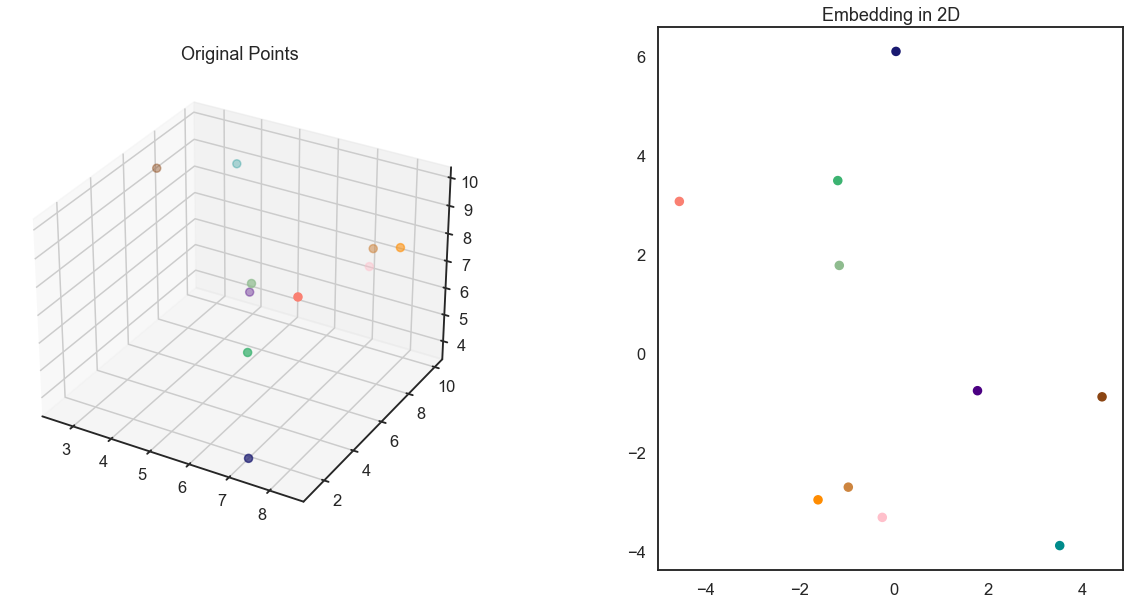

In [120]:
colors = ['darkorange', 'midnightblue', 'salmon', 'saddlebrown', 'peru',
          'darkcyan', 'indigo', 'darkseagreen', 'mediumseagreen', 'pink']
size = [64] * X.shape[0]
fig = plt.figure(2, (20, 10))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

## 3. Practical Multidimensional Scaling On Olivetti Faces Dataset From AT&T

MDS 사용에 있어 보다 실용적인 예제를 들어보겠습니다. [Olivetti faces dataset from AT&T](https://scikit-learn.org/0.19/datasets/olivetti_faces.html) 데이터를 2차원으로 축소시켜서 클래스 별로 데이터가 잘 구분되는 지를 확인해보겠습니다.
- 본 데이터는 한 사람 당 64x64 bit로 구성된 10개의 이미지가 있으며, 각 이미지는 조명 조건과 표정을 다르게 하여 수집되었습니다.
- 여기서 우리의 가정은 __MDS 기법은 원본 데이터의 패턴을 보존하기 때문에, 같은 인물(같은 클래스)이면 클러스터가 가깝게 형성되고, 다른 인물이면 멀리 떨어져 있을 것이다__ 에 기반합니다.
- 간단한 예제를 위해서 총 5명의 사람을 구분하는 Task를 임의로 만들어 보겠습니다.
    - 함수 `Plotting_MDS()`는 원본 데이터셋 `X`, 원본 타겟 값 `y`를 각각 입력 받고, MDS 적용 이전에 `pairwise distance_matrix` 와 어떤 distance를 사용할 지 결정하는 `metric` 및 시각화 시 Plot의 제목 ``plot_title` 을 인자로 받습니다.
    - 이는 MDS를 distance matrix에 적용하여, 변환된 점을 2D 공간에 표시하며 동일한 색상의 점은 동일한 class에 대해 mapping된 결과를 나타냅니다.

In [132]:
def Plotting_MDS(X, y, pairwise_distance_matrix, metric, plot_title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=2022)
    # Get embeddings
    pts = mds.fit_transform(pairwise_distance_matrix)
    
    # Plot the embedding, colored to the class of the points
    fig = plt.figure(2, (20, 10))
    ax = fig.add_subplot(1, 2, 1)
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette='Set1')
    
    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(plot_title)    
    plt.show();

데이터를 불러오겠습니다.

In [127]:
face_data = datasets.fetch_olivetti_faces()
X = face_data.data
y = face_data.target

# 튜토리얼을 위해 5개의 클래스만을 추출
ind = y < 5
X = X[ind, :]
y = y[ind]

### 3-1. Metric: Euclidean Distance
유클리디안 거리를 이용해 얼굴 데이터를 mapping한 결과는 아래와 같습니다.
- 64 x 64 차원의 이미지를 저차원(2차원) 공간으로 Mapping 하는 것을 확인하였습니다. 각 이미지 클래스는 대부분 나머지 클래스와 잘 구분되는데, 고차원(64차원)에서 저차원으로 축소되더라도 여전히 거리 정보가 유지되기 때문입니다.

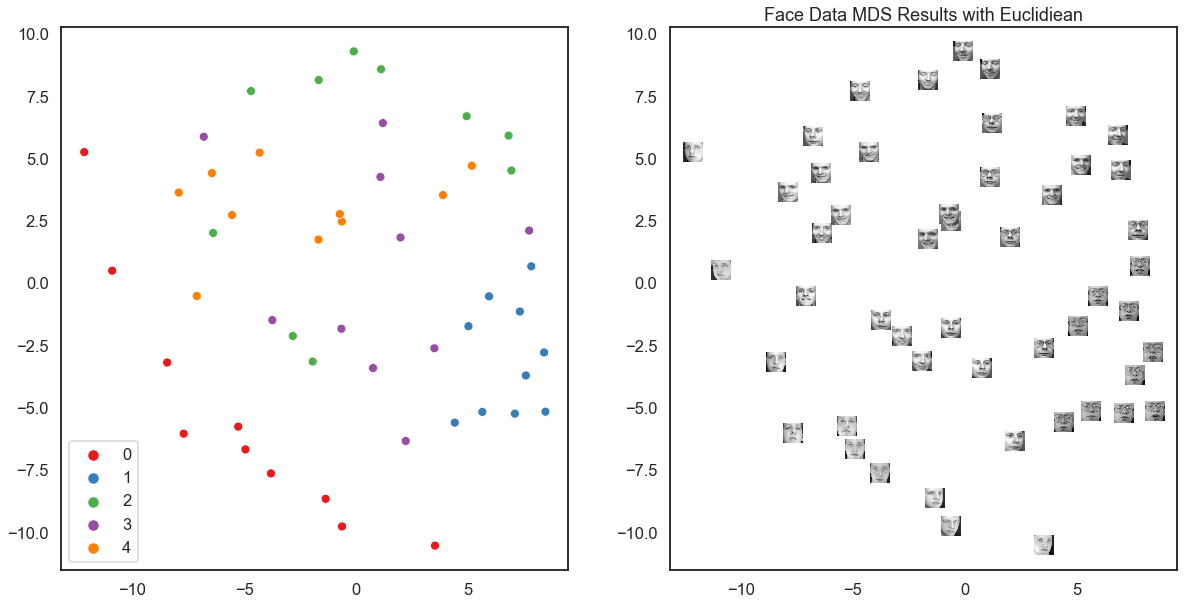

In [134]:
dist_euclid = euclidean_distances(X)
Plotting_MDS(X, y, dist_euclid, True, 'Face Data MDS Results with Euclidiean')

### 3-1. Metric: Manhatten Pairwise Distance
맨하탄 Pairwise 거리를 이용해 얼굴 데이터를 mapping한 결과는 아래와 같습니다.
- 유클리디안 거리를 사용했을 때와 유사한 결과 값을 얻었습니다. 마찬가지로 고차원 데이터가 저차원 공간 상에서도 제대로 구분됨을 확인하였습니다.

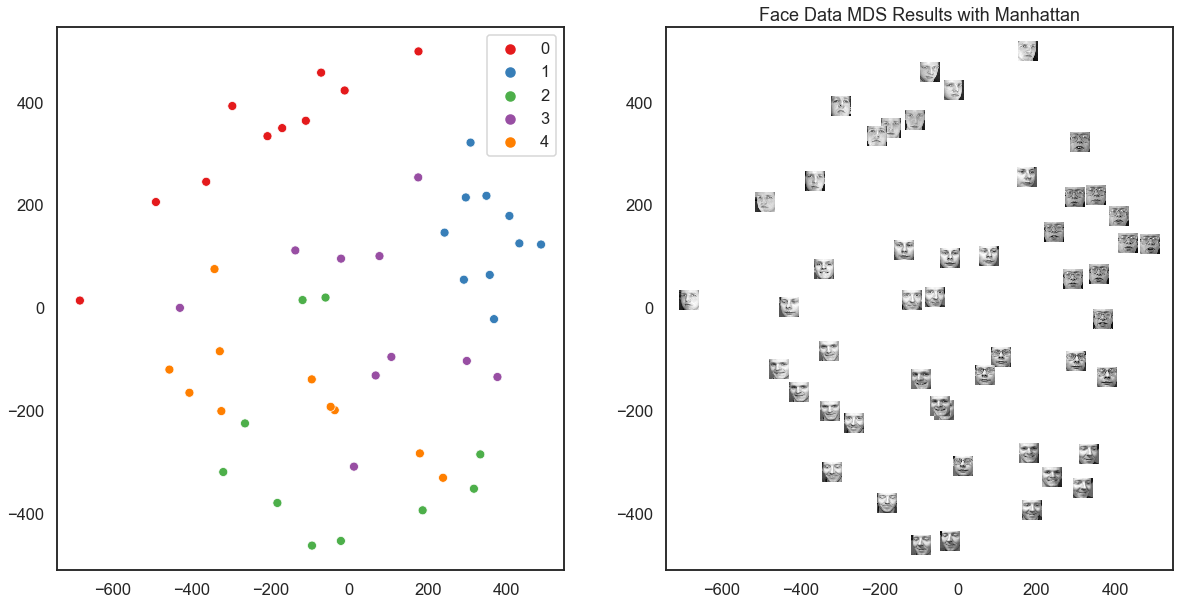

In [135]:
dist_L1 = manhattan_distances(X)
Plotting_MDS(X, y, dist_L1, True, 'Face Data MDS Results with Manhattan')

## 4. `n_components` Parameter in MDS

그렇다면 MDS로 차원을 축소할 때 몇 차원으로 임베딩해야 효율적일까요? Scikit-learn에서는 `n_comonents` 인자로 이를 사용자가 직접 지정할 수 있도록 하였습니다.
- 해당 Hyperparameter를 선택하는 가장 간단한 방법은, 다른 갓에 대해 MDS를 실행한 뒤 각 임베딩에 대한 값을 `n_components` 에 대해 그려보는 것입니다. `stress_` method를 통해 나오는 값은 차원이 높을 수록 감소한다는 점을 감안할 때, 둘 사이에는 절충점이 있씁니다.
- 아래 코드는 위 Facial Data를 1~20 차원으로 변경해가며 MDS를 실행하고, `stress_` 값을 확인합니다.

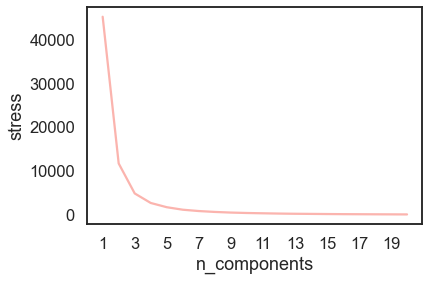

In [136]:
stress = []
# Max value for n_components
max_range = 21
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    # Apply MDS
    pts = mds.fit_transform(dist_euclid)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

- `n_components` 값을 높이면 처음에는 `stress` 값이 감소하지만, 일정 부분 이후로는 수렴함을 알 수 있습니다. 일례로 13차원 이후에는 거의 차이가 없으나 1차원과 2차원 사이에는 큰 차이를 보입니다.
- 따라서 해당 곡선의 elbow point를 잘 찾아서 고차원 데이터를 몇 차원까지 줄여나갈 지를 지정할 수 있습니다.